In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
spam_df=pd.read_csv('emails.csv')

In [5]:
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
spam_df[spam_df['spam']==0] #getting the spam mails

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [7]:
spam_df[spam_df['spam']==1]

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [8]:
import seaborn as sns

In [9]:
non_spam=spam_df[spam_df['spam']==0]

In [10]:
spam=spam_df[spam_df['spam']==1]

<Axes: xlabel='spam', ylabel='count'>

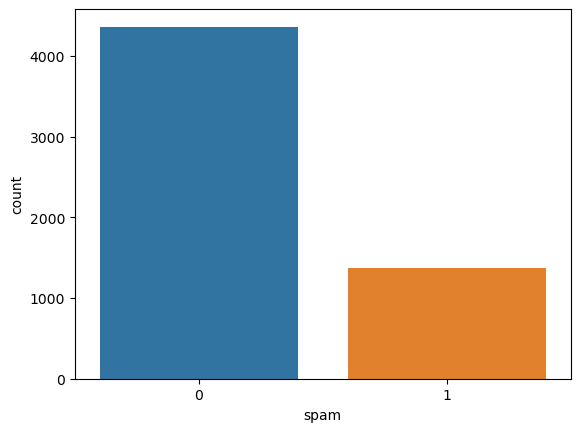

In [16]:
sns.countplot(spam_df,x='spam')

In [ ]:
#we canot use decison tree or random forest because the deapth will incrrease because 

#                                            about  bird heard is the word you
# about the bird, the bird, bird,bird bird -   1      5    0    0  2   0    0

# so here the columns will increase and we know that ifcolumns increases the deapth will increase 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vectorizer=CountVectorizer()

In [21]:
vectorized_data=vectorizer.fit_transform(spam_df['text'])

In [25]:
print(vectorizer.get_feature_names_out()[10000:10050])

['coral' 'coralreef' 'coram' 'corba' 'corbally' 'corbel' 'corbett'
 'corbitt' 'cord' 'cordate' 'cordes' 'cordial' 'cordiality' 'cordially'
 'cordinating' 'cordless' 'core' 'corei' 'corel' 'corestaff' 'corey'
 'corgy' 'corka' 'corley' 'corman' 'corn' 'cornel' 'cornelia' 'cornell'
 'corner' 'cornerstone' 'cornett' 'corney' 'cornfield' 'cornfloor' 'corny'
 'coronach' 'coronal' 'corp' 'corpc' 'corpcustserv' 'corpjobsl'
 'corpoffice' 'corpora' 'corporal' 'corporate' 'corporatemetrics'
 'corporates' 'corporation' 'corporations']


In [26]:
print(vectorized_data)

  (0, 32371)	1
  (0, 23381)	1
  (0, 18838)	1
  (0, 37024)	7
  (0, 10045)	1
  (0, 17688)	1
  (0, 21148)	1
  (0, 18848)	3
  (0, 28018)	1
  (0, 16655)	1
  (0, 33798)	4
  (0, 28142)	1
  (0, 9281)	3
  (0, 33450)	5
  (0, 21665)	2
  (0, 15415)	1
  (0, 24274)	4
  (0, 32635)	1
  (0, 4836)	5
  (0, 18234)	1
  (0, 18885)	1
  (0, 7546)	2
  (0, 16072)	2
  (0, 8043)	1
  (0, 20960)	3
  :	:
  (5727, 24851)	2
  (5727, 21635)	1
  (5727, 5715)	9
  (5727, 30968)	1
  (5727, 2807)	3
  (5727, 13324)	1
  (5727, 13113)	1
  (5727, 17380)	1
  (5727, 14115)	1
  (5727, 20276)	1
  (5727, 31860)	1
  (5727, 13114)	1
  (5727, 20470)	1
  (5727, 35337)	1
  (5727, 8614)	1
  (5727, 30116)	1
  (5727, 13507)	5
  (5727, 36243)	1
  (5727, 943)	2
  (5727, 2776)	1
  (5727, 30316)	1
  (5727, 17582)	1
  (5727, 33970)	1
  (5727, 10354)	1
  (5727, 11368)	1


# Splitting the data into input and output


In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train,y_test=train_test_split(vectorized_data,spam_df['spam'],test_size=0.2)

# Model

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

# Testing evaulation

In [36]:
y_pred=NB_classifier.predict(X_test)

In [37]:
from sklearn.metrics import roc_auc_score

In [42]:
#testing accuracy
roc_auc_score(y_pred,y_test)

#here roc_auc is used because we cant use accuracy due to imbalance in the dataset

0.9886222094471591

In [43]:
#testing for overfitting
y_train_pred=NB_classifier.predict(X_train)

In [44]:
#training accuracy
roc_auc_score(y_train_pred,y_train)
#here the difference in testing and training accuracy is not so high hence not overfit

0.9914866117102461

In [46]:
emails=['hi pratik you will get 1000 rupees for just one click','this is regarding your application']

emails_vectorized=vectorizer.transform(emails)

NB_classifier.predict(emails_vectorized)

array([1, 0], dtype=int64)